<a href="https://colab.research.google.com/github/u-keigo/RRIproject1/blob/main/LSTM_clustering1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTMによる文章分類

参考：https://qiita.com/m__k/items/841950a57a0d7ff05506

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from glob import glob
import pandas as pd
import linecache

# カテゴリを配列で取得
drive_dir = "/content/drive/My Drive/python/"

categories = [name for name in os.listdir(drive_dir + 'text') if os.path.isdir(drive_dir + "text/" +name)]
print(categories)

datasets = pd.DataFrame(columns=["title", "category"])
for cat in categories:
    path = drive_dir + "text/" + cat + "/*.txt"
    files = glob(path)
    for text_name in files:
        title = linecache.getline(text_name, 3)
        s = pd.Series([title, cat], index=datasets.columns)
        datasets = datasets.append(s, ignore_index=True)

# データフレームシャッフル
datasets = datasets.sample(frac=1).reset_index(drop=True)
datasets.head()
#title  category
#0  兼用アンテナ搭載の「Viewer Dock」が同梱！シャープのドコモ向けハイエンドエンタメ系... smax
#1  女は“愛嬌”、男も“愛嬌”-人事担当者がこっそり教える採用ウラ話 vol.6\n  livedoor-homme
#2  社会貢献×ファッションがカッコイイ、今年の春旋風を巻き起こしたMODE for Charit...  peachy
#3  今でも、後でも読めるニュースがここにある！スマホでもタブレットでも読みやすいITニュース活用...   it-life-hack
#4  被災地の缶詰を途上国に…「正気じゃない。人殺しだ!!」\n topic-news

['peachy', 'livedoor-homme', 'it-life-hack', 'movie-enter', 'sports-watch', 'smax', 'kaden-channel', 'dokujo-tsushin', 'topic-news']


,title,category
0,【Sports Watch】應武監督、斎藤らに最後の教え。“プロはとんでもない世界”\n,sports-watch
1,グローバルで差をつけろ！HYBRID W-ZERO3【新生活特集】\n,livedoor-homme
2,タブの多段表示やウィンドウのシングル表示 Firefoxを強化しよう【知っ得！虎の巻】\n,it-life-hack
3,【独女的コミックレビュー】vol.6 『姉の結婚』に見る“枯れ気味女”の憂鬱\n,dokujo-tsushin
4,ミス・ユニバース・ジャパンも習った「柔術」で、護身術をお試し！\n,peachy


In [ ]:

import torch
import torch.nn as nn

# 以下の宣言で行が単語ベクトル、列が単語のインデックスのマトリクスを生成してる感じ
embeds = nn.Embedding(10, 6) # (Embedding(単語の合計数, ベクトル次元数))

# ３行目の要素を取り出したいならば
w1 = torch.tensor([2])
print(embeds(w1))
# tensor([[-1.5947, -0.8387,  0.7669, -0.9644, -0.7902,  2.7167]],
#        grad_fn=<EmbeddingBackward>)

# 3行目、5行目、１０行目の要素を取り出したいならば、
w2 = torch.tensor([2,4,9])
print(embeds(w2))
# tensor([[-1.5947, -0.8387,  0.7669, -0.9644, -0.7902,  2.7167],
#        [ 0.0405,  1.4236,  0.1947,  0.2609,  0.2047, -1.4964],
#        [ 1.7325, -0.2543, -0.5139, -0.9527, -0.1344,  0.0984]],
#       grad_fn=<EmbeddingBackward>)

tensor([[-0.5400,  0.9701,  1.7957,  0.3261,  1.2800, -0.1958]],
       grad_fn=<EmbeddingBackward>)
tensor([[-0.5400,  0.9701,  1.7957,  0.3261,  1.2800, -0.1958],
        [ 0.4320,  0.6343, -1.6826,  1.1063, -0.2363,  1.2425],
        [-0.8309, -0.0217, -1.7661, -0.8426,  0.3200, -0.1763]],
       grad_fn=<EmbeddingBackward>)


In [ ]:
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
aptitude is already the newest version (0.8.10-6ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+main-1)
git is already installed at the requested version (1:2.17.1-1ubuntu0.9)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.16)
xz-utils is already installed at the requested version (5.2.2-1.3)
file is already installed at the requested version (1:5.32-2ubuntu0.4)
mecab is already installed at the requested version (0.996-5)
libmecab-dev is already installed at the requested version (0.996-5)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+ma

In [ ]:
import MeCab
import re
import torch

tagger = MeCab.Tagger("-Owakati")

def make_wakati(sentence):
    # MeCabで分かち書き
    sentence = tagger.parse(sentence)
    # 半角全角英数字除去
    sentence = re.sub(r'[0-9０-９a-zA-Zａ-ｚＡ-Ｚ]+', " ", sentence)
    # 記号もろもろ除去
    sentence = re.sub(r'[\．_－―─！＠＃＄％＾＆\-‐|\\＊\“（）＿■×+α※÷⇒—●★☆〇◎◆▼◇△□(：〜～＋=)／*&^%$#@!~`){}［］…\[\]\"\'\”\’:;<>?＜＞〔〕〈〉？、。・,\./『』【】「」→←○《》≪≫\n\u3000]+', "", sentence)
    # スペースで区切って形態素の配列へ
    wakati = sentence.split(" ")
    # 空の要素は削除
    wakati = list(filter(("").__ne__, wakati))
    return wakati

# テスト
test = "【人工知能】は「人間」の仕事を奪った"
print(make_wakati(test))
# ['人工', '知能', 'は', '人間', 'の', '仕事', 'を', '奪っ', 'た']

# 単語ID辞書を作成する
word2index = {}
for title in datasets["title"]:
    wakati = make_wakati(title)
    for word in wakati:
        if word in word2index: continue
        word2index[word] = len(word2index)
print("vocab size : ", len(word2index))
# vocab size :  13229

# 文章を単語IDの系列データに変換
# PyTorchのLSTMのインプットになるデータなので、もちろんtensor型で
def sentence2index(sentence):
    wakati = make_wakati(sentence)
    return torch.tensor([word2index[w] for w in wakati], dtype=torch.long)

# テスト
test = "例のあのメニューも！ニコニコ超会議のフードコートメニュー14種類紹介（前半）"
print(sentence2index(test))
# tensor([11320,     3,   449,  5483,    26,  3096,  1493,  1368,     3, 11371, 7835,   174,  8280])

['人工', '知能', 'は', '人間', 'の', '仕事', 'を', '奪っ', 'た']
vocab size :  13229
tensor([ 7013,     6,  5155,   880,    46,  2541,  1681,   501,     6, 12574,
         8974,  1023,  6487])


In [ ]:
# 全単語数を取得
VOCAB_SIZE = len(word2index)
# 単語のベクトル数
EMBEDDING_DIM = 10
test = "ユージの前に立ちはだかったJOY「僕はAKBの高橋みなみを守る」"
# 単語IDの系列データに変換
inputs = sentence2index(test)
# 各単語のベクトルをまとめて取得
embeds = nn.Embedding(VOCAB_SIZE, EMBEDDING_DIM)
sentence_matrix = embeds(inputs)
print(sentence_matrix.size())
print(sentence_matrix)
#torch.Size([13, 10])
#tensor([[ 0.5991,  0.2086,  1.6805, -0.2688, -0.5661,  1.0238, -0.8815,  2.0745, 0.8218, -1.0922],
#        [-0.7200,  1.3530, -1.7728, -0.3340, -0.2927, -0.2114,  0.1669,  1.4174, 1.0367, -0.1559],
#        [ 2.0492, -0.0129, -0.1688, -0.4127, -1.8662,  0.6761,  0.0921,  0.3018, 0.0510, -0.9186],
#        [-0.0932, -0.4891,  0.5047, -0.2488, -2.6789,  0.3175,  0.4011,  0.9005, 0.8657, -0.7729],
#        [ 0.6532,  0.8718, -0.6497,  0.5400, -0.1419,  0.8451, -0.5677,  0.1743, -0.0216,  0.8146],
#        [-1.2233, -0.9399,  0.2994,  0.9843,  0.6436, -0.1621,  0.6975, -0.4586, 0.9937, -0.4859],
#        [ 1.1178, -1.2890,  0.6551, -0.3249, -0.1036, -0.4176, -1.6938, -0.6290, -2.7653, -0.1765],
#        [ 0.5090,  1.4671, -0.8971,  1.3293, -0.5948, -1.7585,  0.0609,  0.1469, -0.9665, -0.4266],
#        [-0.7200,  1.3530, -1.7728, -0.3340, -0.2927, -0.2114,  0.1669,  1.4174, 1.0367, -0.1559],
#        [ 0.6907,  1.8703,  0.1093, -0.2989, -0.7074, -0.1824, -1.1053,  0.6469, -1.0702,  2.3492],
#        [ 1.1241, -0.8715,  0.4012, -0.5327, -0.1104,  1.7967, -0.9907,  1.4248, -1.7789,  1.6670],
#        [ 0.2470,  1.8372,  0.9765,  0.5153,  0.0936,  0.2957, -1.7517, -0.0556, -2.0370, -0.7433],
#        [-0.3896,  1.6902, -2.0145, -0.0156,  0.4149,  0.7111,  1.3389, -0.1780, -1.5560, -1.0672]], 
#        grad_fn=<EmbeddingBackward>)

torch.Size([13, 10])
tensor([[-1.5200, -0.4930, -0.2387, -0.2176,  1.4628,  0.0153,  1.7628,  0.9878,
         -1.7934, -3.2405],
        [ 0.1714, -0.0461,  0.1016,  0.4132,  0.3403,  0.0597,  1.0682, -0.0515,
         -0.1603,  0.1370],
        [ 0.0352,  1.3858,  0.3910,  0.1796,  0.0926, -0.8761,  0.3441, -1.4594,
         -0.5751, -0.2654],
        [-0.0450,  1.9036,  0.2475,  0.8978,  1.8762, -0.9210, -0.7353, -0.5800,
          1.5283,  0.1431],
        [-2.0430,  0.0901,  1.0027, -1.1278, -0.2474,  1.4183,  0.4669, -1.8924,
         -2.5465,  0.4438],
        [ 2.0239, -0.1796,  0.5589,  0.0915, -0.4644, -0.7950, -1.6049, -0.0568,
          0.7983, -0.7200],
        [ 0.5676,  1.3695,  0.6456, -0.3103,  0.4275, -0.3117,  1.0550, -1.7020,
          0.8385, -0.6031],
        [ 0.3800, -0.4874, -1.7723,  0.1058,  1.8267, -0.9844,  0.4826,  0.0286,
          0.8099, -0.4022],
        [ 0.1714, -0.0461,  0.1016,  0.4132,  0.3403,  0.0597,  1.0682, -0.0515,
         -0.1603,  0.1370]

In [ ]:
sentence_matrix.view(len(sentence_matrix), 1, -1).size()
# torch.Size([13, 1, 10])

torch.Size([13, 1, 10])

In [ ]:
VOCAB_SIZE = len(word2index)
EMBEDDING_DIM = 10
HIDDEN_DIM = 128
embeds = nn.Embedding(VOCAB_SIZE, EMBEDDING_DIM)
lstm = nn.LSTM(EMBEDDING_DIM, HIDDEN_DIM)
s1 = "震災をうけて感じた、大切だと思ったこと"
print(make_wakati(s1))
#['震災', 'を', 'うけ', 'て', '感じ', 'た', '大切', 'だ', 'と', '思っ', 'た', 'こと']

inputs1 = sentence2index(s1)
emb1 = embeds(inputs1)
lstm_inputs1 = emb1.view(len(inputs1), 1, -1)
out1, out2 = lstm(lstm_inputs1)
print(out1)
print(out2)
# out1
#tensor([[[-0.0146, -0.0069,  0.0323,  ..., -0.0091, -0.0313,  0.0114]],
#        [[-0.0321, -0.0447,  0.0491,  ...,  0.0175, -0.0253,  0.0031]],
#        [[-0.0091, -0.0532,  0.0144,  ..., -0.0411, -0.0329, -0.0310]],
#        ...,
#        [[-0.0061,  0.0423,  0.0123,  ..., -0.0647, -0.0303, -0.0459]],
#        [[-0.0410,  0.0180,  0.0554,  ..., -0.0595, -0.0158, -0.0479]],
#        [[ 0.0323, -0.0564, -0.0181,  ...,  0.0236, -0.0057,  0.0101]]],
#       grad_fn=<StackBackward>)
# out2
#(tensor([[[ 0.0323, -0.0564, -0.0181,  0.0247, -0.0147,  0.0248,  0.0125,
#          (長いので省略)
#          -0.0057,  0.0101]]], grad_fn=<StackBackward>), 
#          tensor([[[ 0.0711, -0.1137, -0.0448,  0.0477, -0.0253,  0.0564,  0.0251,
#          -0.1323,  0.1250,  0.0682,  0.0218, -0.0083, -0.0245,  0.0315,
#          (長いので省略)
#          -0.0124,  0.0266]]], grad_fn=<StackBackward>))

['震災', 'を', 'うけ', 'て', '感じ', 'た', '大切', 'だ', 'と', '思っ', 'た', 'こと']
tensor([[[-4.3445e-02, -2.8424e-02,  1.6503e-02,  ...,  7.7154e-02,
           3.5013e-02, -3.6983e-03]],

        [[-3.5100e-02, -1.0500e-01,  6.1453e-02,  ...,  4.8308e-02,
           2.7695e-02, -1.9385e-03]],

        [[-1.0795e-01, -4.8843e-02,  7.6562e-02,  ...,  1.9854e-02,
          -1.1330e-02,  3.9048e-02]],

        ...,

        [[-6.3185e-02,  5.6127e-03,  6.8614e-05,  ...,  8.7976e-02,
          -1.2266e-02, -6.8669e-02]],

        [[-4.6364e-03, -5.7164e-02,  1.8857e-03,  ...,  1.0970e-02,
          -1.8441e-02, -1.1024e-01]],

        [[ 5.1901e-03, -5.9596e-03, -4.7625e-02,  ..., -8.5453e-03,
          -4.6074e-03, -8.2608e-02]]], grad_fn=<StackBackward>)
(tensor([[[ 0.0052, -0.0060, -0.0476, -0.0296,  0.0757, -0.0301, -0.0730,
           0.0047,  0.0144, -0.0634,  0.0119, -0.0057, -0.0329, -0.0289,
           0.0857, -0.0485,  0.0093, -0.0384, -0.0067, -0.0032,  0.0733,
           0.0095, -0.0504,  0.0

In [ ]:
# nn.Moduleを継承して新しいクラスを作る。決まり文句
class LSTMClassifier(nn.Module):
    # モデルで使う各ネットワークをコンストラクタで定義
    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        # 親クラスのコンストラクタ。決まり文句
        super(LSTMClassifier, self).__init__()
        # 隠れ層の次元数。これは好きな値に設定しても行列計算の過程で出力には出てこないので。
        self.hidden_dim = hidden_dim
        # インプットの単語をベクトル化するために使う
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        # LSTMの隠れ層。これ１つでOK。超便利。
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)
        # LSTMの出力を受け取って全結合してsoftmaxに食わせるための１層のネットワーク
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)
        # softmaxのLog版。dim=0で列、dim=1で行方向を確率変換。
        self.softmax = nn.LogSoftmax(dim=1)

    # 順伝播処理はforward関数に記載
    def forward(self, sentence):
        # 文章内の各単語をベクトル化して出力。2次元のテンソル
        embeds = self.word_embeddings(sentence)
        # 2次元テンソルをLSTMに食わせられる様にviewで３次元テンソルにした上でLSTMへ流す。
        # 上記で説明した様にmany to oneのタスクを解きたいので、第二戻り値だけ使う。
        _, lstm_out = self.lstm(embeds.view(len(sentence), 1, -1))
        # lstm_out[0]は３次元テンソルになってしまっているので2次元に調整して全結合。
        tag_space = self.hidden2tag(lstm_out[0].view(-1, self.hidden_dim))
        # softmaxに食わせて、確率として表現
        tag_scores = self.softmax(tag_space)
        return tag_scores

In [ ]:
category2index = {}
for cat in categories:
    if cat in category2index: continue
    category2index[cat] = len(category2index)
print(category2index)
#{'movie-enter': 0, 'it-life-hack': 1, 'kaden-channel': 2, 'topic-news': 3, 'livedoor-homme': 4, 'peachy': 5, 'sports-watch': 6, 'dokujo-tsushin': 7, 'smax': 8}

def category2tensor(cat):
    return torch.tensor([category2index[cat]], dtype=torch.long)

print(category2tensor("it-life-hack"))
# tensor([1])

{'peachy': 0, 'livedoor-homme': 1, 'it-life-hack': 2, 'movie-enter': 3, 'sports-watch': 4, 'smax': 5, 'kaden-channel': 6, 'dokujo-tsushin': 7, 'topic-news': 8}
tensor([2])


In [ ]:
from sklearn.model_selection import train_test_split
import torch.optim as optim
# 元データを7:3に分ける（7->学習、3->テスト）
traindata, testdata = train_test_split(datasets, train_size=0.7)

# 単語のベクトル次元数
EMBEDDING_DIM = 10
# 隠れ層の次元数
HIDDEN_DIM = 128
# データ全体の単語数
VOCAB_SIZE = len(word2index)
# 分類先のカテゴリの数
TAG_SIZE = len(categories)
# モデル宣言
model = LSTMClassifier(EMBEDDING_DIM, HIDDEN_DIM, VOCAB_SIZE, TAG_SIZE)
# 損失関数はNLLLoss()を使う。LogSoftmaxを使う時はこれを使うらしい。
loss_function = nn.NLLLoss()
# 最適化の手法はSGDで。lossの減りに時間かかるけど、一旦はこれを使う。
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 各エポックの合計loss値を格納する
losses = []
# 100ループ回してみる。（バッチ化とかGPU使ってないので結構時間かかる...）
for epoch in range(100):
    all_loss = 0
    for title, cat in zip(traindata["title"], traindata["category"]):
        # モデルが持ってる勾配の情報をリセット
        model.zero_grad()
        # 文章を単語IDの系列に変換（modelに食わせられる形に変換）
        inputs = sentence2index(title)
        # 順伝播の結果を受け取る
        out = model(inputs)
        # 正解カテゴリをテンソル化
        answer = category2tensor(cat)
        # 正解とのlossを計算
        loss = loss_function(out, answer)
        # 勾配をセット
        loss.backward()
        # 逆伝播でパラメータ更新
        optimizer.step()
        # lossを集計
        all_loss += loss.item()
    losses.append(all_loss)
    print("epoch", epoch, "\t" , "loss", all_loss)
print("done.")

epoch 0 	 loss 11019.400385141373
epoch 1 	 loss 10216.27023331821
epoch 2 	 loss 9413.558435201645
epoch 3 	 loss 8762.354743001983
epoch 4 	 loss 8200.416140274145
epoch 5 	 loss 7678.259021232603
epoch 6 	 loss 7182.8662072317675
epoch 7 	 loss 6715.630126240896
epoch 8 	 loss 6281.116249682789
epoch 9 	 loss 5881.546746600943
epoch 10 	 loss 5613.708644058701
epoch 11 	 loss 5117.234844568011
epoch 12 	 loss 4715.216110028923
epoch 13 	 loss 4298.017658276498
epoch 14 	 loss 3878.6192948155185
epoch 15 	 loss 3443.949579124819
epoch 16 	 loss 3012.5058112450733
epoch 17 	 loss 2564.2704926020238
epoch 18 	 loss 2155.053878522586
epoch 19 	 loss 1737.3363366552428
epoch 20 	 loss 1365.4779011653682
epoch 21 	 loss 1131.0684179004716
epoch 22 	 loss 805.1157771816696
epoch 23 	 loss 535.7107901094704
epoch 24 	 loss 558.4800955573522
epoch 25 	 loss 386.3579472255079
epoch 26 	 loss 271.49811416906334
epoch 27 	 loss 157.83489891885853
epoch 28 	 loss 121.93418756843838
epoch 29 	 lo

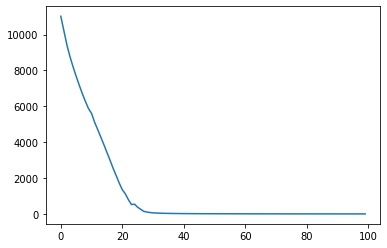

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(losses)

過学習を疑う

In [ ]:
traindata_num = len(traindata)
a = 0
with torch.no_grad():
    for title, category in zip(traindata["title"], traindata["category"]):
        inputs = sentence2index(title)
        out = model(inputs)
        _, predict = torch.max(out, 1)
        answer = category2tensor(category)
        if predict == answer:
            a += 1
print("predict : ", a / traindata_num)
# predict :  0.9984505132674801

predict :  0.9990315707921751


In [ ]:
import collections
# IDをカテゴリに戻す用
index2category = {}
for cat, idx in category2index.items():
    index2category[idx] = cat

# answer -> 正解ラベル、predict->LSTMの予測結果、exact->正解してたらO,間違っていたらX
predict_df = pd.DataFrame(columns=["answer", "predict", "exact"])

# 予測して結果を上のDFに格納
with torch.no_grad():
    for title, category in zip(testdata["title"], testdata["category"]):
        out = model(sentence2index(title))
        _, predict = torch.max(out, 1)
        answer = category2tensor(category)
        exact = "O" if predict.item() == answer.item() else "X"
        s = pd.Series([answer.item(), predict.item(), exact], index=predict_df.columns)
        predict_df = predict_df.append(s, ignore_index=True)

# Fスコア格納用のDF
fscore_df = pd.DataFrame(columns=["category", "all","precison", "recall", "fscore"])

# 分類器が答えた各カテゴリの件数
prediction_count = collections.Counter(predict_df["predict"])
# 各カテゴリの総件数
answer_count = collections.Counter(predict_df["answer"])

# Fスコア求める
for i in range(9):
    all_count = answer_count[i]
    precision = len(predict_df.query('predict == ' + str(i) + ' and exact == "O"')) / prediction_count[i]
    recall = len(predict_df.query('answer == ' + str(i) + ' and exact == "O"')) / all_count
    fscore = 2*precision*recall / (precision + recall)
    s = pd.Series([index2category[i], all_count, round(precision, 2), round(recall, 2), round(fscore, 2)], index=fscore_df.columns)
    fscore_df = fscore_df.append(s, ignore_index=True)
print(fscore_df)

         category  all  precison  recall  fscore
0          peachy  232      0.46    0.45    0.46
1  livedoor-homme  162      0.57    0.54    0.55
2    it-life-hack  266      0.65    0.67    0.66
3     movie-enter  256      0.49    0.53    0.51
4    sports-watch  276      0.51    0.53    0.52
5            smax  269      0.88    0.84    0.86
6   kaden-channel  264      0.86    0.83    0.85
7  dokujo-tsushin  245      0.61    0.67    0.64
8      topic-news  243      0.58    0.52    0.55
